## Unemployment rates at different levels of education in Denmark
This project examines the development in unemployment with regard to education during the financial crisis in Denmark. The question will be answered using the Denmark Statistics data set AUL08 and NAN1.

Firstly, the data set will be imported and then arranged properly. 

In [2]:
#Import needed packages
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#Import data
import os
assert os.path.isdir("Data/")
assert os.path.isfile("Data/AUL08.xlsx")

## Read and clean data

**The unedited dataset**

This is the dataset AUL08 unedited

In [4]:
filename = "Data/AUL08.xlsx" #Defining the filename
empl = pd.read_excel(filename).head(10) #Importing the file
empl

,"Fuldtidsledige efter køn, personer/pct., område, højeste fuldførte uddannelse, alder og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Enhed: -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
2,I alt,Fuldtidsledige (antal),Hele landet,H10 Grundskole,Alder i alt,34978.8,26664.9,44771.3,51745.9,47298.7,45664.4,42162.6,32058.6,28520.5,25815.7,29341.7,25862.3
3,NaN,NaN,NaN,NaN,16-24 år,5229.9,4821.7,8224.9,8700.3,7549.8,6818.3,6119.5,2157.7,1780.7,1746.3,2859.4,2206.6
4,NaN,NaN,NaN,NaN,25-29 år,4596.1,3623.5,5750.1,6505.9,5860.8,5636.6,5431.9,2540.8,2103.7,2145.4,3402.0,2795.1
5,NaN,NaN,NaN,NaN,30-34 år,4676.5,3470.6,5204.7,5807.5,5334.8,5209.3,4933.8,4319.3,3932.3,3719.0,4571.9,4072.5
6,NaN,NaN,NaN,NaN,35-39 år,4141.0,3132.8,5155.3,5894.9,5290.5,4981.3,4699.0,4253.9,3718.2,3503.6,4012.6,3571.0
7,NaN,NaN,NaN,NaN,40-44 år,4046.5,3023.5,5185.3,5939.8,5182.8,4932.3,4610.3,4066.7,3631.4,3186.6,3411.9,3012.8
8,NaN,NaN,NaN,NaN,45-49 år,3181.2,2514.1,4867.3,5945.4,5469.2,5281.6,4948.5,4232.2,3607.3,2998.0,2926.3,2631.5
9,NaN,NaN,NaN,NaN,50-54 år,2912.3,2219.2,4451.7,5484.8,5063.3,5033.1,4760.3,4214.3,3698.5,3189.9,3064.2,2634.4


**Cleaning and structuring the dataset**

In the project, only three educational levels will be examined; **"Grundskole"**(Elementary School), **"Erhvervsfaglige Uddannelser"**(Vocational education) and **"Lange videregående uddannelser"**(Masters degrees). Therefore, irrelevant rows and columns are removed, resulting in the following table:


In [5]:
#Getting rid of unnecesary rows and columns 
empl = pd.read_excel(filename, skiprows = 2) #Skipping the two first rows
drop_these = ["Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 4"]
empl.drop(drop_these, axis=1, inplace=True)

#Renaming Column 3 to "Education"
empl.rename(columns={"Unnamed: 3":"Education"}, inplace=True)

#Extracting useful rows
X = empl.Education.str.contains("Grundskole")
X|= empl.Education.str.contains("Erhvervsfaglige")
X|= empl.Education.str.contains("Lange")
tabel2 = empl.loc[X,:]
tabel2

,Education,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,H10 Grundskole,34978.8,26664.9,44771.3,51745.9,47298.7,45664.4,42162.6,32058.6,28520.5,25815.7,29341.7,25862.3
20,H30 Erhvervsfaglige uddannelser,31251.9,22625.0,48652.8,63959.7,60227.9,60166.6,56188.1,49533.7,44556.4,37985.9,34466.9,31129.4
60,"H70 Lange videregående uddannelser, LVU",8644.5,5945.7,8572.0,11188.7,12178.3,13536.7,13749.1,13783.4,13472.2,14469.8,16013.4,16466.3


## Data Analysis and further convertion of data

**Converting to annual change**

As of now we have imported and sorted the data resulting in the above table. This will make the data analysis and readibility much clearer and easier to work with.

As shown in the table above, the unemployment number has had multiple drastic increases and decreases during the period from 2007 to 2018. In the first 2 years, from 2007 to 2008, there is a major decrease in the number of unemployed people. This is due to the peak of the economic boom (pre-September 2008). Thereafter, in 2009, there is a relatively big increase in unemployment for all three groups. Afterwards the unemployment stays at a pretty stable level until the year 2014 where the unemployment for all groups begin to decrease once again. To analyse this and the relationship between the three educational levels further, the data will now be converted to percentage change from year-to-year.

The reason for the choosing of these specific educational levels are that they are the most contrastful. This will be done using annual growth which shows how one group changes as opposed to the absolute values which should provide a more nuanced picture of the evolution within each educational levels.

In [6]:
#Convert to percentage change
tabel1 = tabel2.astype(dtype="object") #Making all types the same for the pct_change to work
Perc=tabel1.pct_change(axis=1)*100 # Calculating pct. change using pct_change and multiplying with 100
Perc2=round(Perc,2) #Reducing the decimal points to only two
Perc2.drop("2007", axis=1, inplace=True) #Removing 2007 because of NaN for the first year

#Change index
Education= ["Elementary School", "Vocational education", "Masters degrees"]
Perc2["Education"] = Education
Perc2_true = Perc2.set_index('Education')

Perc2_true #Showing the table

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Education,,,,,,,,,,,
Elementary School,-23.77,67.90,15.58,-8.59,-3.46,-7.67,-23.96,-11.04,-9.48,13.66,-11.86
Vocational education,-27.60,115.04,31.46,-5.83,-0.10,-6.61,-11.84,-10.05,-14.75,-9.26,-9.68
Masters degrees,-31.22,44.17,30.53,8.84,11.15,1.57,0.25,-2.26,7.40,10.67,2.83


## Visualisation of data

**Illustrating the annual change**

To visualize the changes, the data has to be transposed to fix the axis. Then it can be presented in the following plot:

(-40, 120)

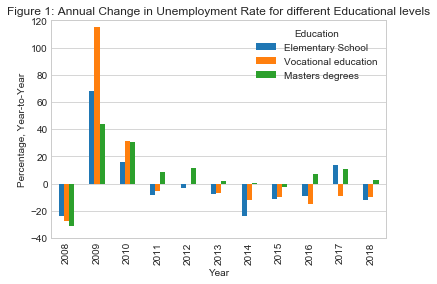

In [27]:
# Transposing table in order to make figure
Perc_T=Perc2_true.T

# Plotting the figure
fig = Perc_T.plot.bar()
fig.set_xlabel("Year")
fig.set_ylabel("Percentage, Year-to-Year")
fig.set_title("Figure 1: Annual Change in Unemployment Rate for different Educational levels")
fig.xaxis.grid() #show only vertical gridlines.
fig.set_ylim([-40,120])

**Data Analysis**

From 2008-2009 there is an explosive increase in unemployment across all levels, though especially for people with vocational education.
From 2009-2016 there is still an increase in unemployment for master degrees, however the increase is much smaller and there is a decrease for the to other levels. From 2016-2018 there is an increase for elementary school and master degree and a decrease for vocational school. Therefore, it seems reasonable to assume that low-skilled workers are hit the hardest in a financial crisis.

To prove the hypothesis that the unemployment rate for low-skilled workers should increase more than the unemployment rate for high-skilled worker during the financial crisis, the GDP of Denmark will be imported and compared to the unemployment. This will show how much the financial crisis affected unemployment and when this effect happened - was there a delay?  

## Introducing new data set

**Set up of new data set**

In [13]:
#Importing new data for GDP
filename_2 = "Data/BNP.xlsx" #Defining the filename
GDP = pd.read_excel(filename_2).head(5) #Importing the file
GDP = pd.read_excel(filename_2, skiprows = 2) #Skipping the two first rows

#Renaming columns in order to fit table properly
GDP.columns = ['','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', "2017", "2018", "2019"]

#Set up Index in order to make figure
GDP_indexed = GDP.set_index('')

#Remove "2019" since our data for unemployment does not support this year
drop_these1 = ["2019"]
GDP_indexed.drop(drop_these1, axis=1, inplace=True)

#Showing the table
GDP_indexed

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
,,,,,,,,,,,,
"B.1*g Bruttonationalprodukt, BNP",1879,1869.4,1777.7,1810.9,1835.1,1839.3,1856.5,1886.5,1930.7,1993.4,2034,2082.6


In [14]:
#Transpose and convert to Percent change Year-to-Year.
GDP_obj = GDP_indexed.astype(dtype="object")
GDP_T=GDP_obj.T
GDP_Perc=GDP_T.pct_change()*100
GDP_perc = GDP_Perc.rename(columns = {"B.1*g Bruttonationalprodukt, BNP":"GDP, Year-to-year"},inplace="True")
round(GDP_Perc, 2)

,"GDP, Year-to-year"
2007,NaN
2008,-0.51
2009,-4.91
2010,1.87
2011,1.34
2012,0.23
2013,0.94
2014,1.62
2015,2.34
2016,3.25


In [18]:
#Setting up data for the sum of unemployed people.
X |= empl.Education.str.contains("H100")
tabel3 = empl.loc[X,:]

#Indexing and renaming Education-column
tabel3_indexed=tabel3.set_index("Education")

tabel3_indexed

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Education,,,,,,,,,,,,
H100 Sum,101272.3,73048.7,130068.3,163265.8,159058.5,161045.4,152948.0,133111.4,122394.3,112382.8,115568.3,107722.3


## Final visualisation of merged data sets

**Setting up and plotting the two data sets into figure**

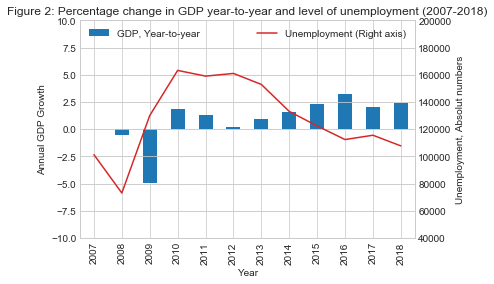

In [24]:
#Plotting figure and relevant axis labels and title 
ax1 =GDP_Perc.plot.bar()
ax1.set_xlabel("Year")
ax1.set_ylabel("Annual GDP Growth")
ax1.set_title("Figure 2: Percentage change in GDP year-to-year and level of unemployment (2007-2018)")
plt.legend(loc="upper left")

#Fixing primart  y-axis and grid.
axes = plt.gca()
axes.set_ylim([-10,10])

#Inserting secondary y-axis
ax2=ax1.twinx()
ax2.set_ylim([40000,200000])

#Fixing secondary y-axis
color = 'tab:red'
ax2.set_ylabel('Unemployment, Absolut numbers') 
ax2.plot(tabel3_indexed.T,  color=color, label = "Unemployment (Right axis)")
ax2.tick_params(axis='y')
plt.legend(loc="best")

**Final Data Analysis of merged data sets**

The unemployment rate evolves much like previously mentioned, though it is now the whole workforce. There is a visible correlation between unemployment and the financial crisis. However, there is a delay - the change in unemployment hits after a year of the recession, and vice versa in the later years. It is important to remember that the unemployment in absolute numbers does not account for the growth in the population.

It is clear that the financial crisis put many companies under financial pressure in order to keep their businesses going. That meant alot of layoffs in the period, which resulted in an overall lower demand in these years. It took around 4 years (2012) to slowly start the decrease of the unemployment, and concurrently increase the annual GDP growth aswell. After 4 years of recession, the economy again reentered the boom (2013) in which we have had since.

## Conclusion

In conclusion there is a greater effect on low-skilled workers during financial recession, and changes to the unemployment tends, in general, to be more volatile than high-skilled. However, this volatility makes it, so the unemployment tends to disappear quicker in comparison to high-skilled workers. This may be because of the bigger layoffs in the industry in comparison to the tertiary proffesions, such as office workers. It is furthermore clear, that the financial crisis did influence all educational levels, though some groups were hit harder than others. The general hit on the economy influenced the consumption, which and there had a hit on the society as a whole.
